# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
df_data.year.min()

1901

In [8]:
df_data.year.max()

2020

In [9]:
print(f'shape: {df_data.shape} \nrows: {df_data.shape[0]} and columns: {df_data.shape[1]}')
print(f'columns: {[column for column in df_data.columns]}')
print(f'Nobel prize first awarded at: {df_data.year.min()}')
print(f'Latest year: {df_data.year.max()}')

shape: (962, 16) 
rows: 962 and columns: 16
columns: ['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_type', 'full_name', 'birth_date', 'birth_city', 'birth_country', 'birth_country_current', 'sex', 'organization_name', 'organization_city', 'organization_country', 'ISO']
Nobel prize first awarded at: 1901
Latest year: 2020


In [10]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [12]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [13]:
df_data.isna().values.any()

True

In [14]:
df_data.isna().any()

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [15]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

There are a lot of missing values in the dataset.

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Birth Date to Datetime

In [16]:
# df_data.year= pd.to_datetime(df_data.year, format='%Y')
df_data.birth_date= pd.to_datetime(df_data.birth_date)

In [17]:
df_data.tail(5)

year  category                                           prize  \
957  2020  Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020     Peace                      The Nobel Peace Prize 2020   
959  2020   Physics                 The Nobel Prize in Physics 2020   
960  2020   Physics                 The Nobel Prize in Physics 2020   
961  2020   Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                   full_name birth_date  \
957    Individual            Michael Houghton 1949-07-02   
958  Organization  World Food Programme (WFP)        NaT   
959    Individual                 Andrea Ghez 1965-06-16   
960    Individual             Reinhard Genzel 1952-03-24   
961    Individual               Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      organization_country  ISO  
957          Edmonton                    Canada  GBR  
958               NaN                       NaN  NaN  
959      Berkeley, CA  United States of America  USA  
960   Los Angeles, CA  United States of America  DEU  
961            Oxford            United Kingdom  GBR

#### Add a Column with the Prize Share as a Percentage

In [18]:
seperated_values= df_data.prize_share.astype(str).str.split('/',expand=True)
numerator= pd.to_numeric(seperated_values[0])
denomenator= pd.to_numeric(seperated_values[1])
df_data['share_pct']= numerator/denomenator
df_data.head(2)

year    category                               prize  \
0  1901   Chemistry   The Nobel Prize in Chemistry 1901   
1  1901  Literature  The Nobel Prize in Literature 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16      Paris   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   
1        France                France  Male                NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00

In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [20]:
import plotly.express as px

In [21]:
gender= df_data.sex.value_counts()

In [22]:
fig= px.pie(labels= gender.index, values=gender.values, title='Genderwise Nobel Winners', names=gender.index)
fig.update_traces(textposition='outside', textfont_size=15, textinfo='label+percent', hole=0.4)


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [23]:
df_data[df_data.sex=='Female'].sort_values('year',ascending=True)[:3]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [24]:
multiple_winners= df_data[df_data.duplicated(subset=['full_name'],keep=False)]

In [25]:
print(f'There are {multiple_winners.full_name.nunique()} winners who were awarded more than once.')

There are 6 winners who were awarded more than once.


In [26]:
col_subsets=['year','category','laureate_type','full_name']
multiple_winners[col_subsets]

year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [27]:
df_data.category.unique().size

6

In [28]:
cat_prize= df_data.category.value_counts()

In [29]:
bar= px.bar(x=cat_prize.index, y=cat_prize.values, 
            color= cat_prize.values,
            color_continuous_scale= 'Aggrnyl',
            title='No of prizes awarder per category')
bar.update_layout(xaxis_title='Category',
                 yaxis_title= 'No of prizes awarded',                  
                 coloraxis_showscale=False)
bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [30]:
df_data[df_data.category=='Economics'].sort_values('year')[:3]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  share_pct  
393               Netherlands  NLD       0.50  
394                    Norway  NOR       0.50  
402  United States of America  USA       1.00

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [31]:
gender_cat = df_data.groupby(['category','sex'],as_index=False).agg({'prize':pd.Series.count})
gender_cat.sort_values('prize',ascending=False,inplace=True)

In [32]:
bar= px.bar(x=gender_cat.category, y=gender_cat.prize, color=gender_cat.sex)
bar.update_layout(xaxis_title= 'Nobel Prize Category',
                 yaxis_title= 'Number of prizes',
                 title= 'Number of Prizes Awarder per Category by Men and Women')

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [33]:
df_data.year.value_counts()

year
2001    15
2019    14
1996    13
2018    13
2000    13
        ..
1915     4
1924     3
1914     3
1918     2
1916     1
Name: count, Length: 117, dtype: int64

In [34]:
prize_per_year= df_data.groupby(by='year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [35]:
moving_average= prize_per_year.rolling(window=5).mean()

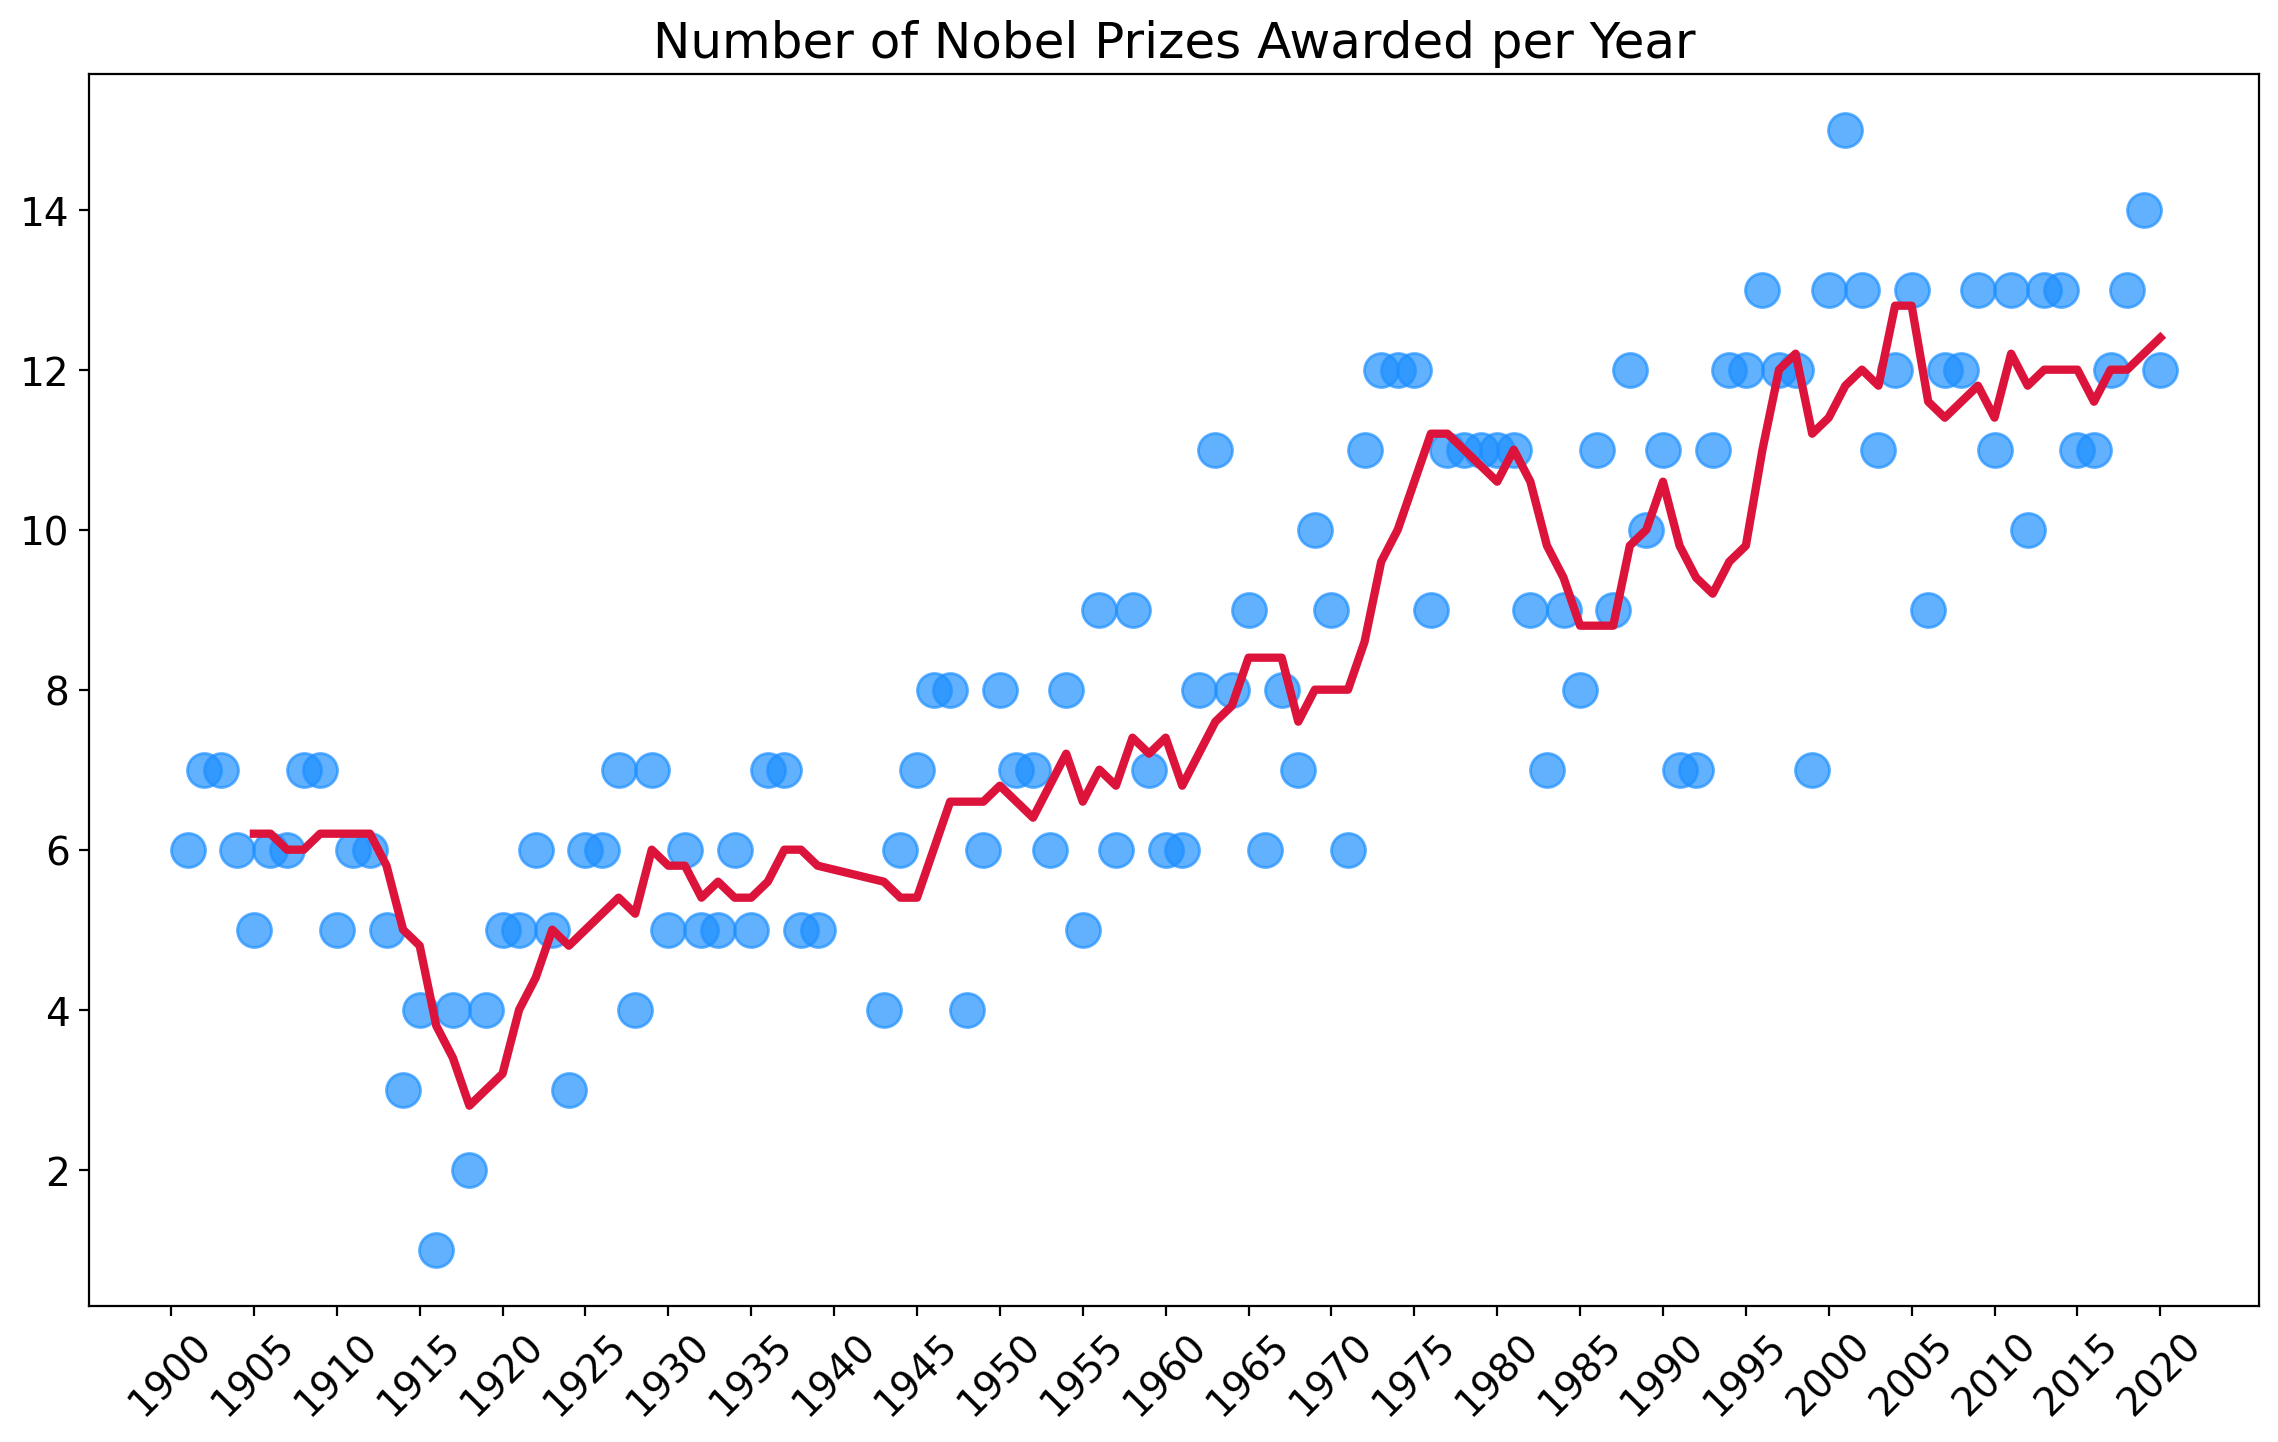

In [36]:
plt.figure(figsize=(14,8),dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(np.arange(1900,2021,5), fontsize=14, rotation=45)
ax= plt.gca()

ax.scatter(x=prize_per_year.index, y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s= 150)
ax.plot(prize_per_year.index, moving_average.values,
         color='crimson', 
        linewidth=3,)
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [37]:
share_per_year= df_data.groupby('year').agg({'share_pct':pd.Series.mean})
rolling_avg= share_per_year.rolling(window=5).mean()

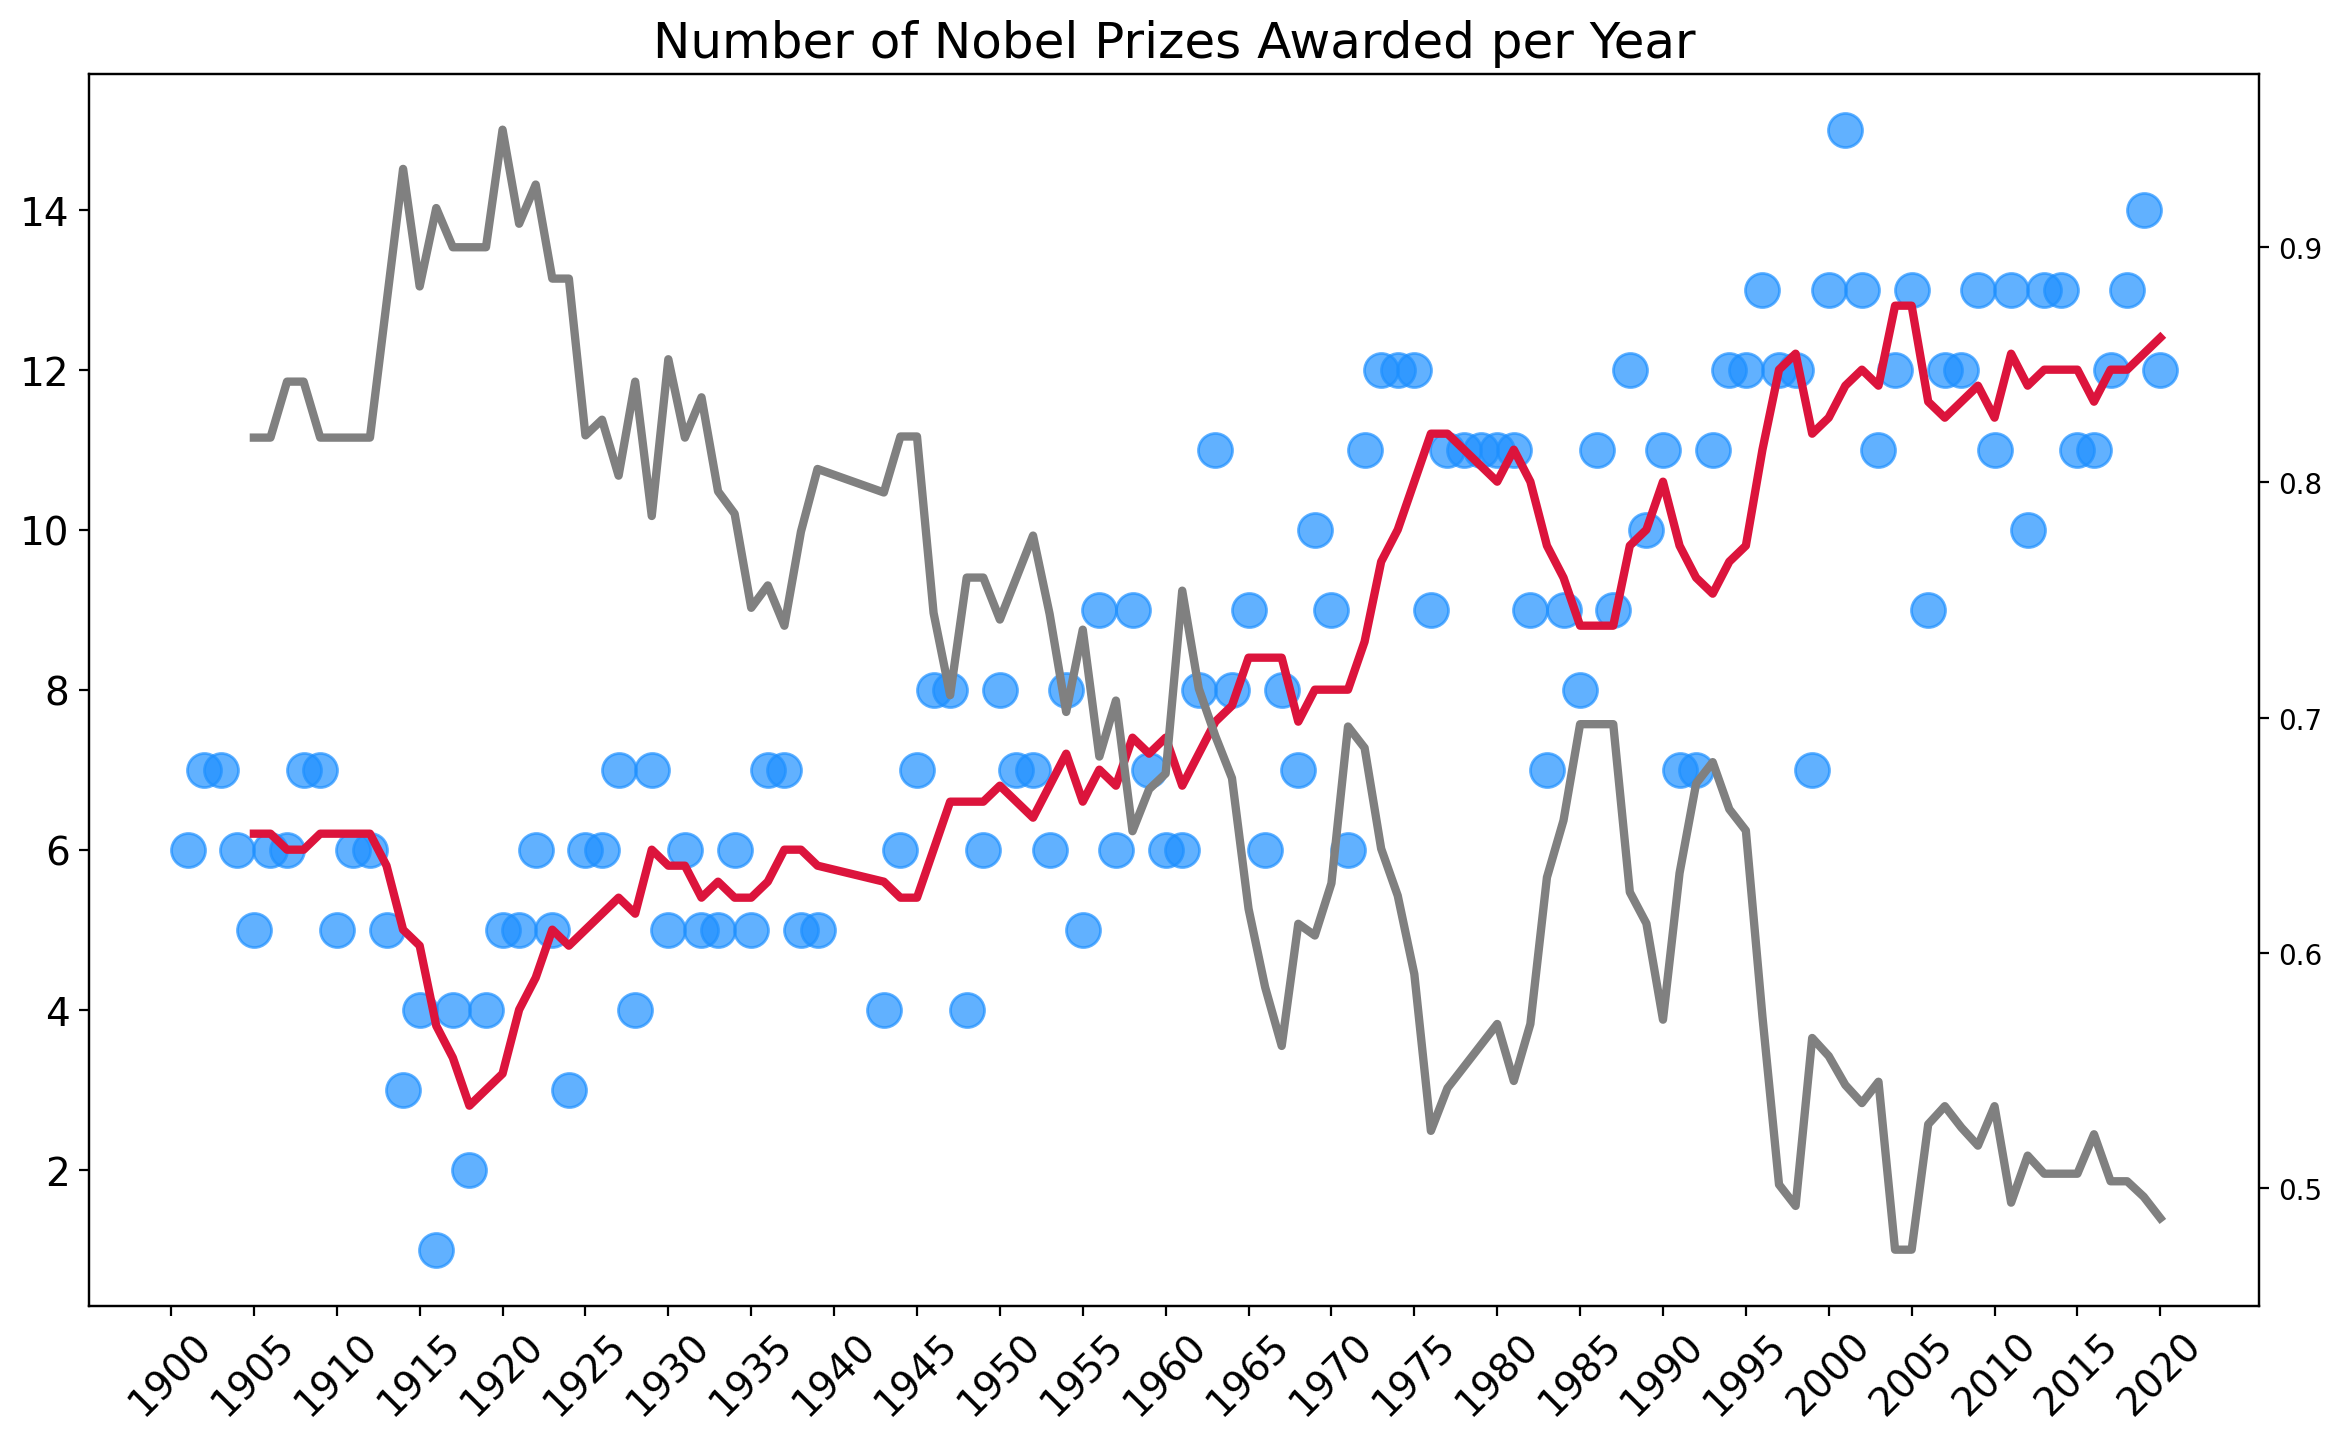

In [38]:
plt.figure(figsize=(14,8),dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(np.arange(1900,2021,5), fontsize=14, rotation=45)
ax1= plt.gca()
ax2= ax1.twinx()
ax1.scatter(x=prize_per_year.index, y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s= 150)
ax1.plot(prize_per_year.index, moving_average.values,
         color='crimson', 
        linewidth=3,)
# plot prize share on secondary axis
ax2.plot(prize_per_year.index,rolling_avg.values,
         c='grey', 
        linewidth=3,)
plt.show()

## Inverted axis

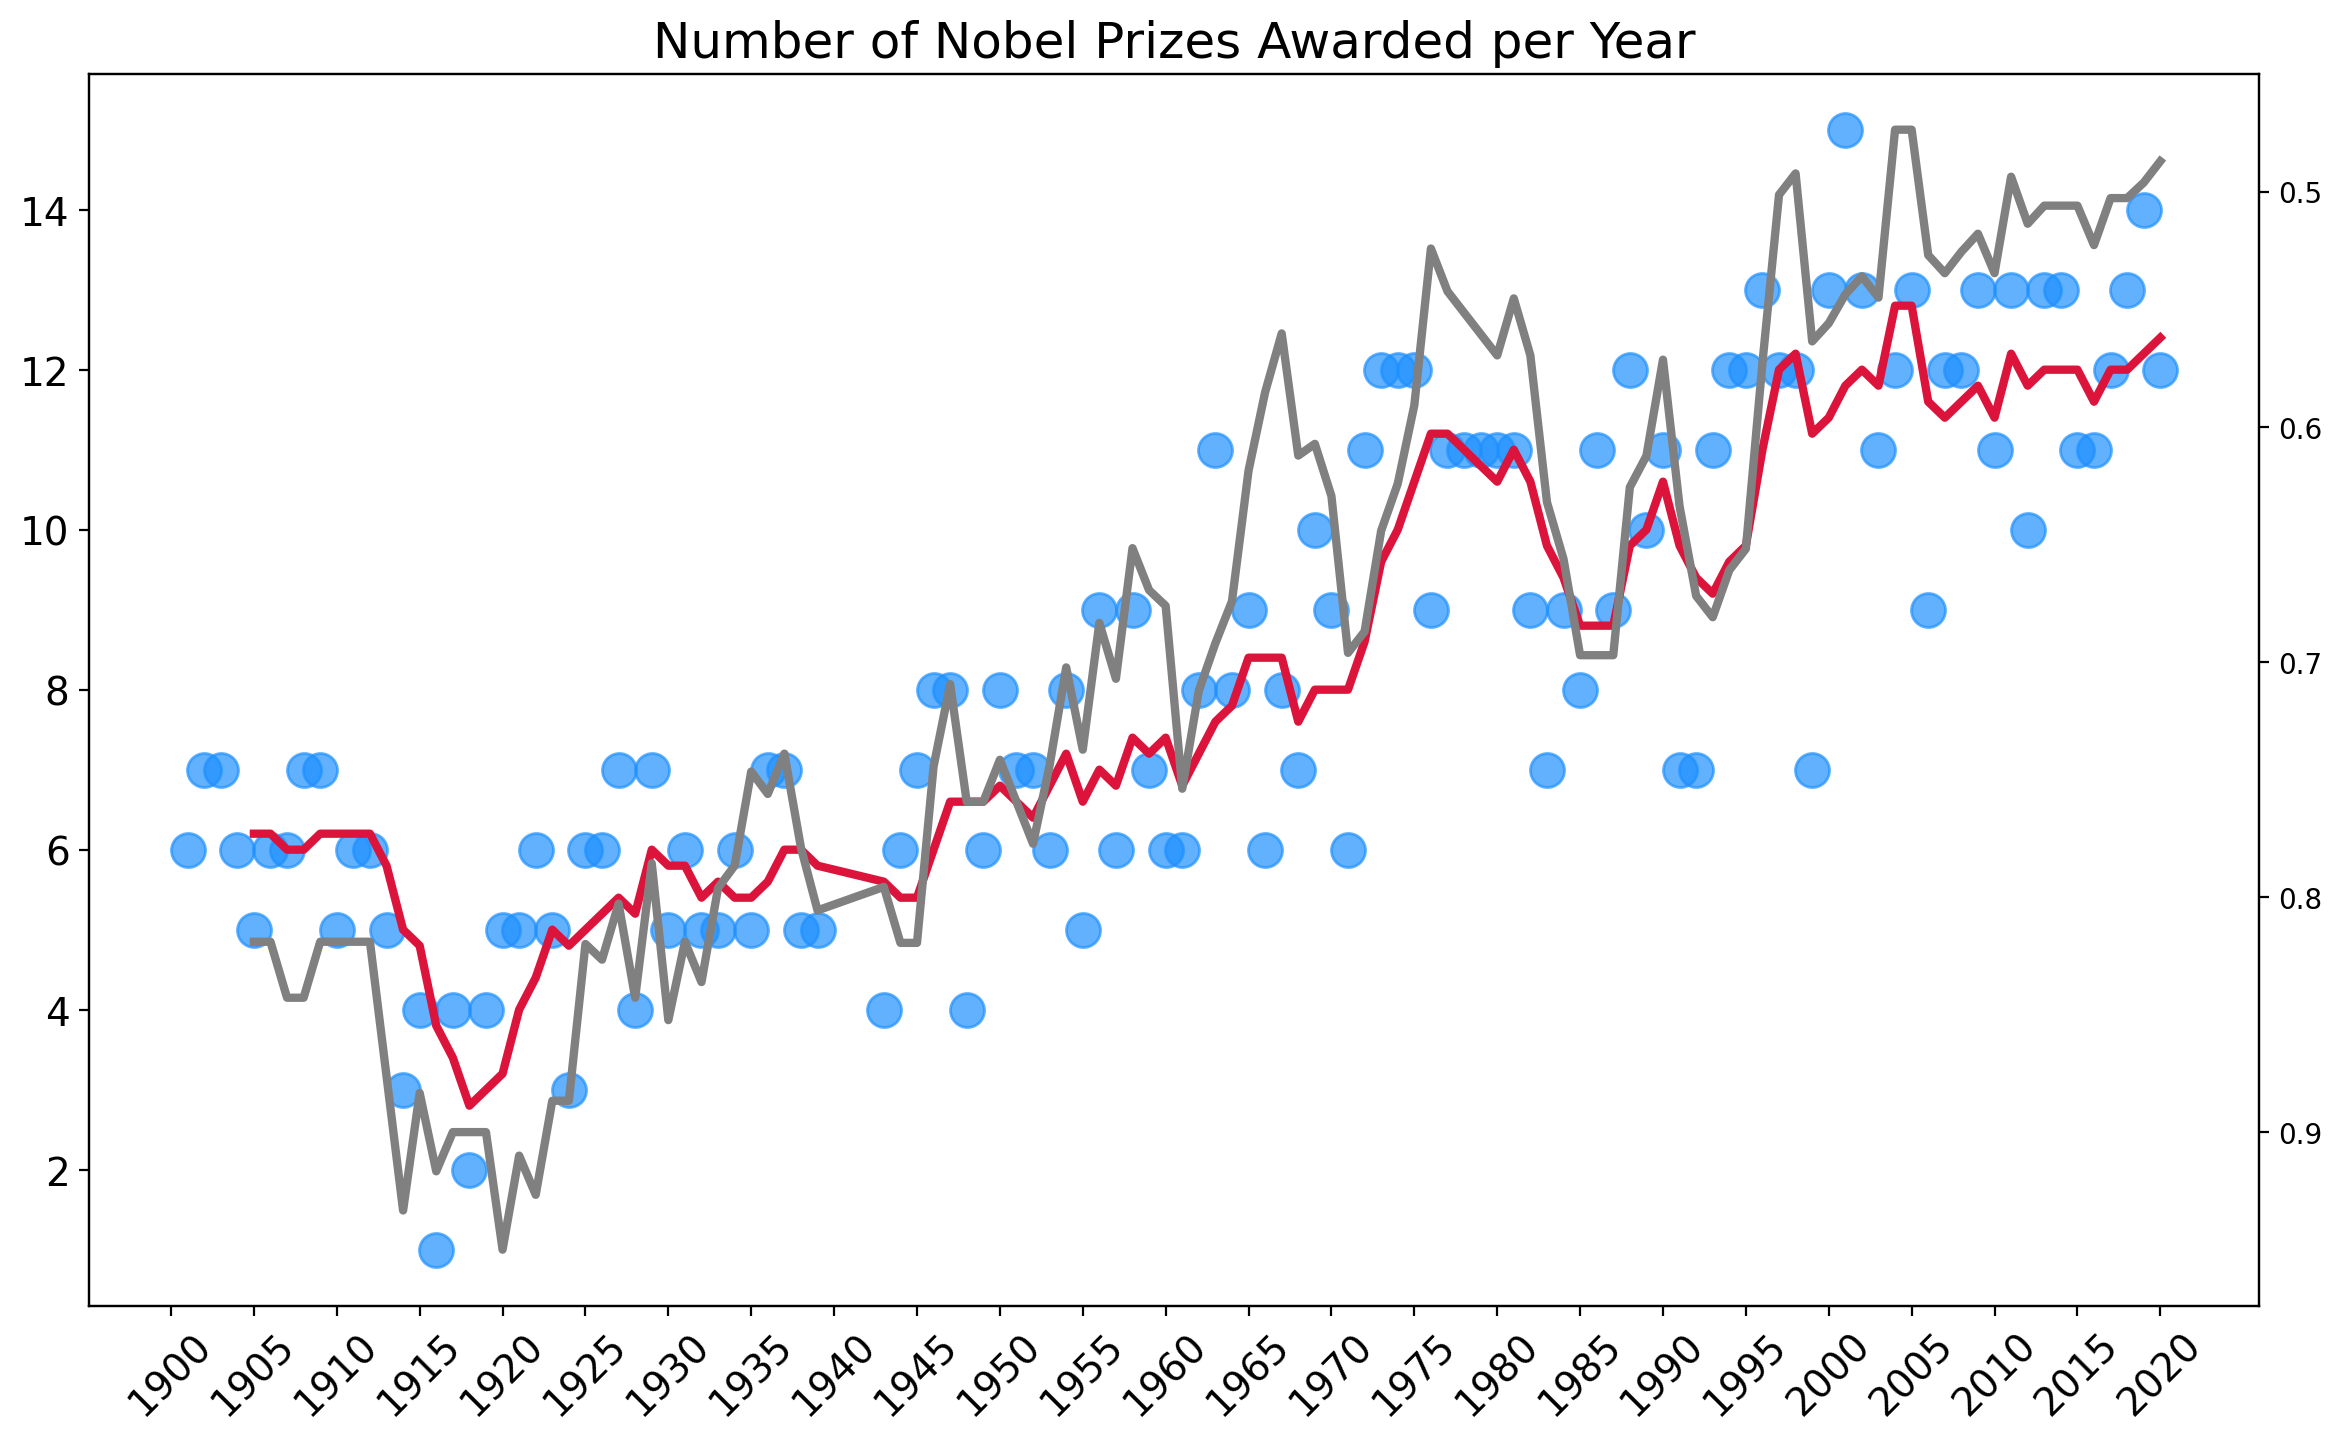

In [39]:
plt.figure(figsize=(14,8),dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(np.arange(1900,2021,5), fontsize=14, rotation=45)
ax1= plt.gca()
ax2= ax1.twinx()
# invert hte axis
ax2.invert_yaxis()
ax1.scatter(x=prize_per_year.index, y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s= 150)
ax1.plot(prize_per_year.index, moving_average.values,
         color='crimson', 
        linewidth=3,)
# plot prize share on secondary axis
ax2.plot(prize_per_year.index,rolling_avg.values,
         c='grey', 
        linewidth=3,)
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [40]:
top_countries= df_data.groupby('birth_country_current',as_index=False).agg({'prize':pd.Series.count})
top_countries.sort_values('prize', inplace=True)
top20_countries= top_countries[-20:]

In [41]:
top20_countries

birth_country_current  prize
7                    Belgium      9
31                   Hungary      9
33                     India      9
2                  Australia     10
20                   Denmark     12
54                    Norway     12
13                     China     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
40                     Japan     27
57                    Poland     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

In [42]:
bar= px.bar(top20_countries, y='birth_country_current', x='prize',orientation='h',
           title='Top 20 Countries by Number of Prizes',
           color=top20_countries.prize,
           color_continuous_scale='Viridis')
bar.update_layout(xaxis_title='No of prizes',
                 yaxis_title= 'Country',
                 coloraxis_showscale=False)

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [43]:
countries= df_data.groupby(['birth_country_current','ISO'],as_index=False).agg({'prize':pd.Series.count})

In [44]:
world_map= px.choropleth(countries,locations='ISO', color='prize', color_continuous_scale= px.colors.sequential.matter,
                         hover_name='birth_country_current')
world_map.update_layout(title='Prizes won by Countries in Choropleth', coloraxis_showscale=True)
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [45]:
country_cat= df_data.groupby(['birth_country_current','category'],as_index=False).agg({'prize':pd.Series.count})
country_cat.sort_values('prize',ascending=False,inplace=True)

In [46]:
merged_df= pd.merge(country_cat,top20_countries, on='birth_country_current')
# merged_df.columns= ['birth_country_current','category', 'cat_prize', 'total_prize']
merged_df.rename(columns= {'prize_x':'cat_prize','prize_y':'total_prize'},inplace=True)
merged_df.sort_values(['total_prize'], inplace=True)

In [47]:
merged_df

birth_country_current   category  cat_prize  total_prize
109                     India    Physics          1            9
108                     India      Peace          1            9
88                    Belgium      Peace          3            9
89                    Belgium   Medicine          3            9
90                    Belgium  Chemistry          1            9
..                        ...        ...        ...          ...
4    United States of America      Peace         19          281
3    United States of America  Economics         49          281
2    United States of America  Chemistry         55          281
1    United States of America    Physics         70          281
0    United States of America   Medicine         78          281

[110 rows x 4 columns]

In [48]:
bar_prize= px.bar(merged_df, y='birth_country_current', x='cat_prize', orientation='h',
#                   hover_name= 'total_prize',
      color='category')
bar_prize.update_layout(xaxis_title='No of Prizes',
                       yaxis_title= 'Country',
                       title= 'Top 20 countries by Number of Prizes and Category',
                       )

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [49]:
prize_by_year= df_data.groupby(['birth_country_current','year'],as_index=True).agg({'prize':pd.Series.count})
prize_by_year

prize
birth_country_current    year       
Algeria                  1957      1
                         1997      1
Argentina                1936      1
                         1947      1
                         1980      1
...                              ...
United States of America 2020      7
Venezuela                1980      1
Vietnam                  1973      1
Yemen                    2011      1
Zimbabwe                 1960      1

[627 rows x 1 columns]

## cumulative sum

In [50]:
# cumulative_prizes= prize_by_year.groupby('birth_country_current').cumsum()    or 
cumulative_prizes= prize_by_year.groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

In [51]:
cumulative_chart= px.line(cumulative_prizes, x='year', y='prize',
       color='birth_country_current',
       hover_name= 'birth_country_current')
cumulative_chart.update_layout(xaxis_title='Year',
                             yaxis_title= 'Number of Prizes')
cumulative_chart.show()

### Alternatively......

In [52]:
cumulative_prizes= df_data.groupby(['birth_country_current','year']).agg({'prize':pd.Series.count}).groupby('birth_country_current').cumsum()
cumulative_prizes.reset_index(inplace=True)

In [53]:
cumulative_chart= px.line(cumulative_prizes, x='year', y='prize',
       color='birth_country_current',
       hover_name= 'birth_country_current')
cumulative_chart.update_layout(xaxis_title='Year',
                             yaxis_title= 'Number of Prizes')
cumulative_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [54]:
top20_org= df_data.groupby('organization_name',as_index=False).agg({'prize':pd.Series.count}).sort_values('prize',ascending=False)[:20]
top20_org.sort_values('prize',inplace=True)

In [55]:
top20_org_bar= px.bar(top20_org, y='organization_name', x='prize', color='prize',
                      color_continuous_scale= px.colors.sequential.haline,
                     title='Top 20 Research Institutions by Number of Prizes')
top20_org_bar.update_layout(xaxis_title= 'No of prize',
                           yaxis_title= 'Organization',                            
                           coloraxis_showscale=False)
top20_org_bar.show()

In [56]:
top_20= df_data.organization_name.value_counts()[:20]
top_20.sort_values(inplace=True)

org_bar= px.bar(y= top_20.index, x= top_20.values, color= top_20.values, orientation='h',
               color_continuous_scale= px.colors.sequential.haline)
org_bar.update_layout(xaxis_title= 'No of Prizes',
                     yaxis_title= 'Organization',
                     coloraxis_showscale=False)
org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [57]:
top20_city= df_data.organization_city.value_counts()[:20]
top20_city.sort_values(inplace=True)

In [58]:
city_bar= px.bar(x= top20_city.values, y= top20_city.index, orientation='h', color=top20_city.values,
                color_continuous_scale= px.colors.sequential.Plasma)
city_bar.update_layout(xaxis_title= 'No of Prize',
                      yaxis_title='City',
                       title='City vs Research',
                      coloraxis_showscale=False)

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [59]:
b_city= df_data.birth_city.value_counts()[:20]
b_city.sort_values(inplace=True)

In [60]:
b_city_bar= px.bar(x= b_city.values, y= b_city.index, orientation='h', color=b_city.values,
                color_continuous_scale= px.colors.sequential.Plasma)
b_city_bar.update_layout(xaxis_title= 'No of Prize',
                      yaxis_title='Birth City',
                       title='Where were Nobel Laureates born ?',
                      coloraxis_showscale=False)

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [61]:
org_data= df_data.groupby(['organization_country','organization_city','organization_name'],as_index=False).agg({'prize':pd.Series.count})
org_data.sort_values('prize',ascending=False, inplace=True)

In [62]:
fig= px.sunburst(org_data, path=['organization_country','organization_city','organization_name'], values='prize')
fig.update_layout(title='Sunburst chart of organization hierarchy')
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [63]:
birth_year= df_data.birth_date.dt.year
df_data['winning_age']= df_data.year - birth_year
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00  
2           Marburg              Germany  POL       1.00        47.00  
3               NaN                  NaN  FRA       0.50        79.00  
4               NaN                  NaN  CHE       0.50        73.00

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [64]:
df_data.loc[[df_data.winning_age.idxmin()]]

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK       0.50        17.00

In [65]:
df_data.loc[[df_data.winning_age.idxmax()]]

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU       0.33        97.00

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [66]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

Text(0.5, 1.0, 'Distribution of Age on Receipt of Prize')

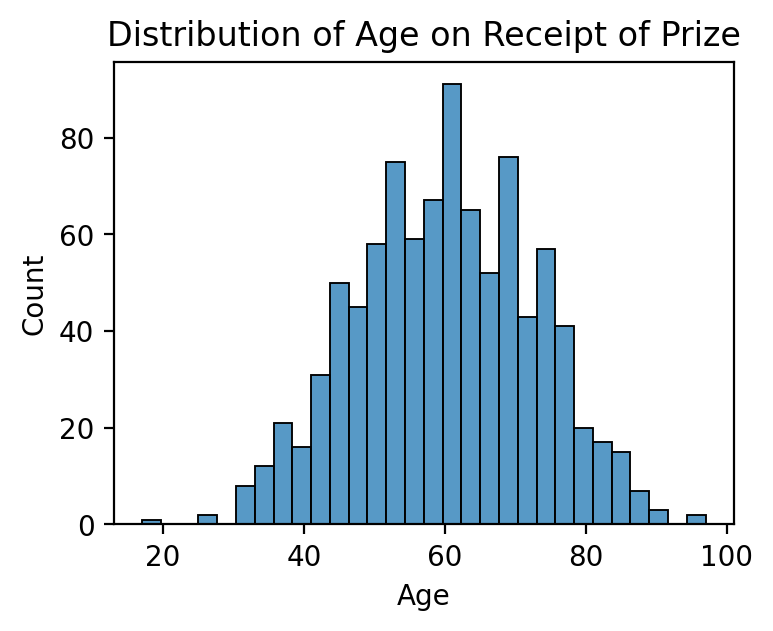

In [67]:
plt.figure(figsize=(4,3),dpi=200)
sns.histplot(data=df_data, x='winning_age',bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')


<Axes: xlabel='winning_age', ylabel='Count'>

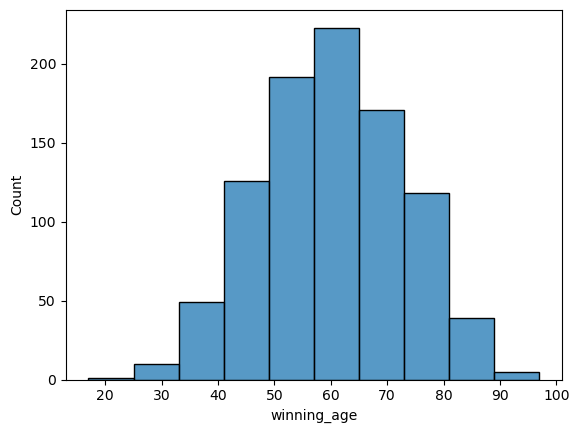

In [68]:
sns.histplot(data=df_data, x='winning_age',bins=10)

<Axes: xlabel='winning_age', ylabel='Count'>

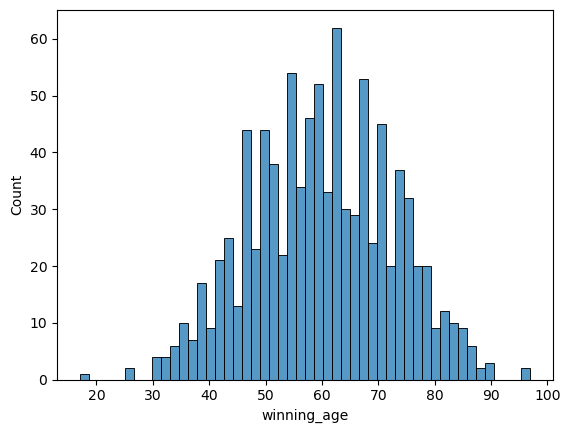

In [69]:
sns.histplot(data=df_data, x='winning_age',bins=50)

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


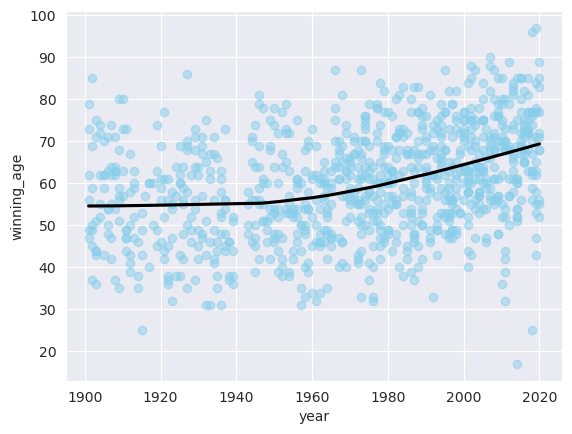

In [70]:
with sns.axes_style('darkgrid'):
    sns.regplot(data=df_data, x='year', y='winning_age',
               lowess=True,
                scatter_kws={'alpha':0.5, 'color':'skyblue'},
               line_kws={'color':'black'})

- lowless parameter is used as the dataset seems to be non-linear over time which smothens the regression line to visualize the moving average.
- According to the best fit line, Nobel laureates were around 55 years old in the years 1900-1940 when they were awarded the prize.
- Also it predicts the age of a Nobel laureates will be 70 in the year 2020.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

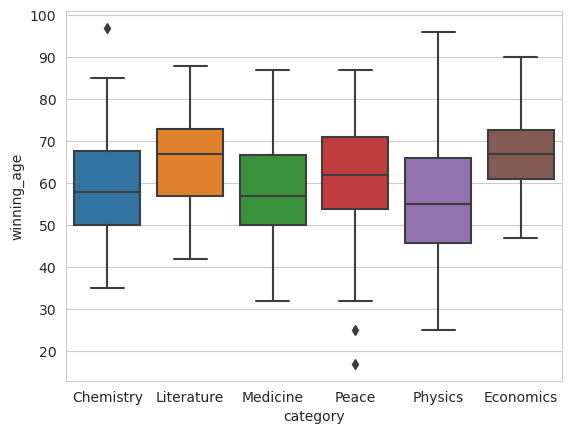

In [71]:
with sns.axes_style('whitegrid'):
    sns.boxplot(data=df_data, x= 'category', y='winning_age')


- **Whiskers:** Represent the range of the data within 1.5 * IQR (Interquartile Range) from the quartiles.
- **Outliers:** Points beyond the whiskers.
- Physics has the longest whiskers.
The Economics contains the oldest winners in average whereas Physics has the younger population.
    

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


C:\Users\me\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



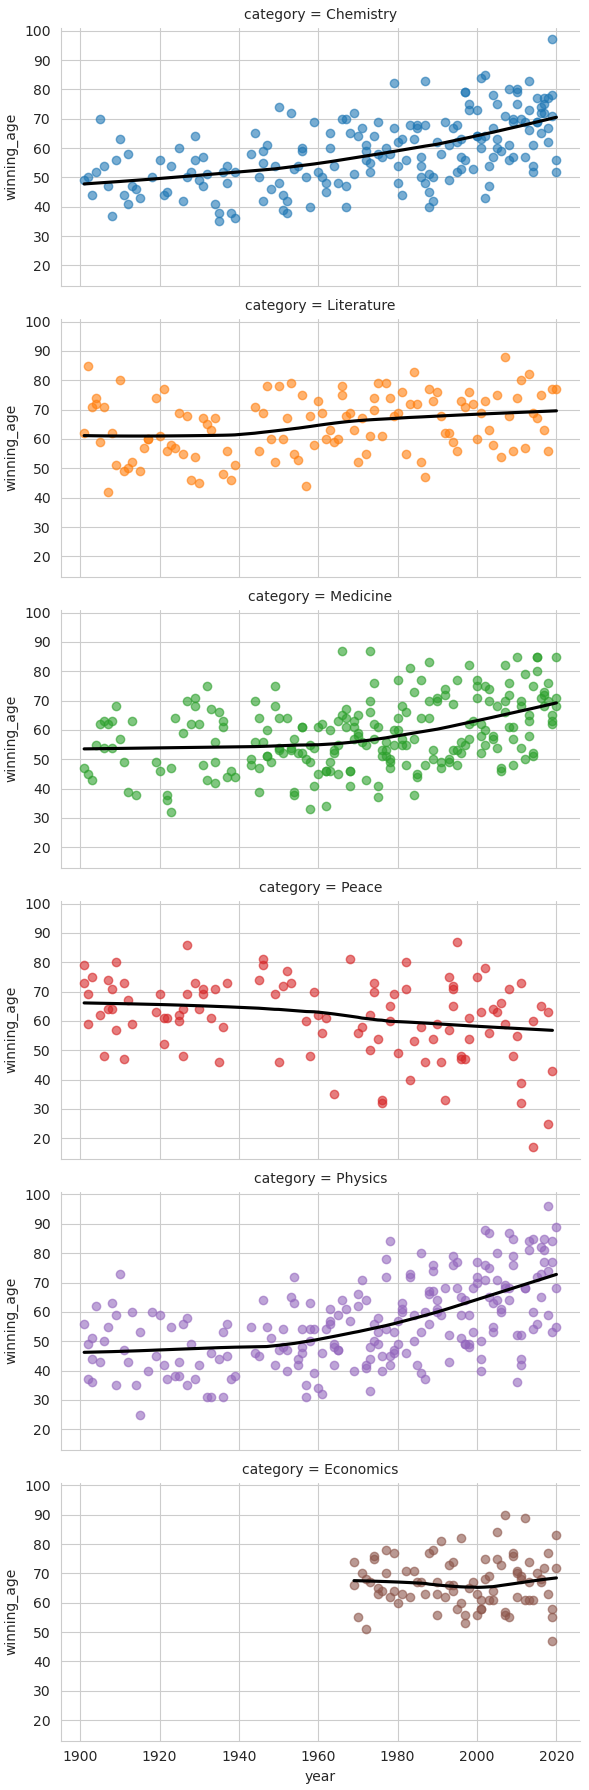

In [72]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data, x='year', y='winning_age',
               row='category',
               hue='category',
               height=3,
               aspect=2,
              lowess=True,               
              scatter_kws={'alpha':0.6},
               line_kws= {'color':'black'}
              )
    


C:\Users\me\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



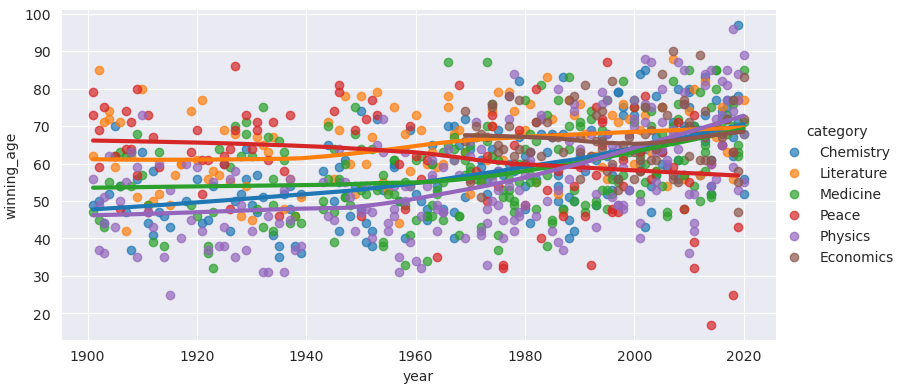

In [73]:
with sns.axes_style('darkgrid'):
    sns.lmplot(data=df_data, x='year',y='winning_age',hue='category',
              height=4,
               aspect=2,
               lowess=True,
               scatter_kws={'alpha':0.7},
               line_kws={'linewidth':3}                            
              )